# DeWatermark

In [1]:
import cv2
import numpy as np
from math import log10
import matplotlib.pyplot as plt

In [2]:
def calculate_psnr(original, compared):
    def mse(original, compared):
     return np.mean((original - compared) ** 2)

    mse_val = mse(original, compared)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255 / np.sqrt(mse_val))

In [3]:
def dewatermark(watermarked, watermark):
    alpha = watermark[:,:,3]
    watermark = watermark[:,:,0:3]
    res = ((watermarked - ((alpha[... , np.newaxis] * 0.3)*watermark)))/(1-(alpha[... , np.newaxis]*0.3))
    res = np.clip(res, 0 , 1)
    return res


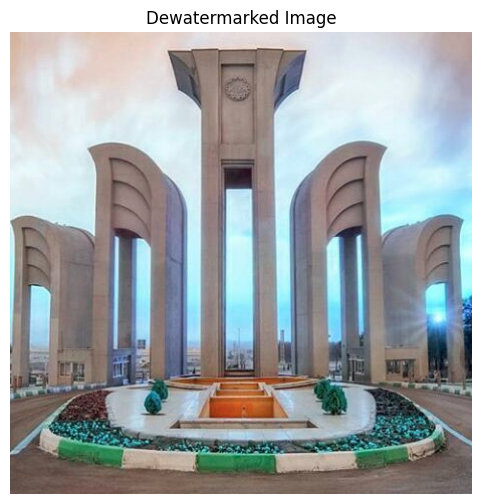

PSNR between dewatermarked and original: 107.34 dB


In [4]:
watermarked_path = r"D:\techstack2025-ai\week1\task\images_part1\watermarked.png"
watermark_path = r"D:\techstack2025-ai\week1\task\images_part1\iut.png"
original_path = r"D:\techstack2025-ai\week1\task\images_part1\original.png"


watermarked = plt.imread(watermarked_path).astype(np.float32)
watermark = (plt.imread(watermark_path, cv2.IMREAD_UNCHANGED).astype(np.float32))
original = plt.imread(original_path).astype(np.float32) 
 

dewatermarked = dewatermark(watermarked, watermark)
psnr_value = calculate_psnr(original, dewatermarked)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(dewatermarked, cv2.COLOR_BGR2RGB))
plt.title('Dewatermarked Image')
plt.axis('off')
plt.show()

print(f"PSNR between dewatermarked and original: {psnr_value:.2f} dB")